<a href="https://colab.research.google.com/github/rohanreddych/stuff/blob/master/rnn-lstm-without-pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
from tensorflow.keras import layers

In [ ]:
!wget http://mng.bz/0tIo --no-check-certificate

--2020-06-23 05:51:18--  http://mng.bz/0tIo
Resolving mng.bz (mng.bz)... 35.166.24.88
Connecting to mng.bz (mng.bz)|35.166.24.88|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mng.bz/0tIo [following]
--2020-06-23 05:51:18--  https://mng.bz/0tIo
Connecting to mng.bz (mng.bz)|35.166.24.88|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 301 
Location: http://s3.amazonaws.com/text-datasets/aclImdb.zip [following]
--2020-06-23 05:51:19--  http://s3.amazonaws.com/text-datasets/aclImdb.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.25.214
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.25.214|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60711700 (58M) [application/zip]
Saving to: ‘0tIo’

0tIo                100%[===================>]  57.90M  23.7MB/s    in 2.4s    

2020-06-23 05:51:22 (23.7 MB/s) - ‘0tIo’ saved [60711700/60711700]

In [ ]:
!mv 0tIo data.zip

In [ ]:
!unzip data.zip

In [ ]:
import re

def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

In [ ]:
print(len(os.listdir("aclImdb/train/neg")), len(os.listdir("aclImdb/train/pos")))

12500 12500


In [ ]:
import os
labels = []
texts = []
for i in os.listdir("/content/aclImdb/train/neg"):
    f = open("/content/aclImdb/train/neg/"+i, "r")
    str1 = f.read()
    str1 = cleanhtml(str1)
    texts.append(str1)
    labels.append(0)
for i in os.listdir("/content/aclImdb/train/pos"):
    f = open("/content/aclImdb/train/pos/"+i, "r")
    str1 = f.read()
    str1 = cleanhtml(str1)
    texts.append(str1)
    labels.append(1)

In [ ]:
max_features = 10000
max_len = 120

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)

In [ ]:
tokenizer.fit_on_texts(texts)
data = tokenizer.texts_to_sequences(texts)

In [ ]:
tokenizer.word_index

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data = pad_sequences(data, maxlen=max_len)

In [72]:
#without pretrained embeddings
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
model = tf.keras.models.Sequential()
model.add(layers.Embedding(max_features, 64, input_length=120))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 120, 64)           640000    
Total params: 640,000
Trainable params: 640,000
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.SimpleRNN(64))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 120, 64)           640000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                8256      
Total params: 648,256
Trainable params: 648,256
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 120, 64)           640000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                8256      
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 648,321
Trainable params: 648,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [ ]:
_S = _S.shuffle(100)

In [ ]:
import numpy as np
data = np.asarray(data)
labels = np.asarray(labels)

In [ ]:
model.fit(data, labels,batch_size=64, epochs=10, validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 12s 43ms/step - loss: 0.5262 - accuracy: 0.7514 - val_loss: 0.4825 - val_accuracy: 0.7852
Epoch 2/10
274/274 [==============================] - 11s 42ms/step - loss: 0.3212 - accuracy: 0.8699 - val_loss: 0.7988 - val_accuracy: 0.6229
Epoch 3/10
274/274 [==============================] - 12s 43ms/step - loss: 0.2201 - accuracy: 0.9149 - val_loss: 0.8560 - val_accuracy: 0.6149
Epoch 4/10
274/274 [==============================] - 11s 42ms/step - loss: 0.1248 - accuracy: 0.9546 - val_loss: 0.8870 - val_accuracy: 0.6691
Epoch 5/10
274/274 [==============================] - 11s 42ms/step - loss: 0.0589 - accuracy: 0.9797 - val_loss: 1.2313 - val_accuracy: 0.5940
Epoch 6/10
274/274 [==============================] - 12s 42ms/step - loss: 0.0294 - accuracy: 0.9899 - val_loss: 1.0858 - val_accuracy: 0.7061
Epoch 7/10
274/274 [==============================] - 12s 42ms/step - loss: 0.0201 - accuracy: 0.9936 - val_loss: 1.4957 - val_accuracy:

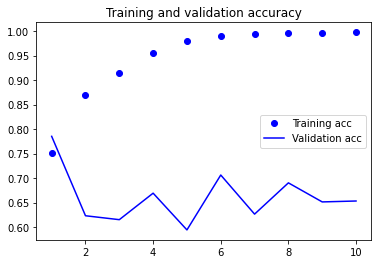

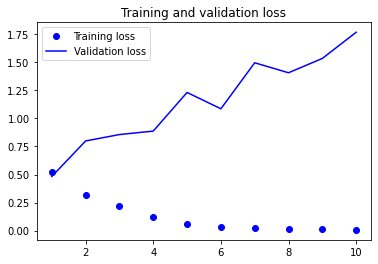

In [ ]:
hist = model.history.history
acc = hist["accuracy"]
val_acc = hist["val_accuracy"]
loss = hist["loss"]
val_loss = hist["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [73]:
model.add(layers.LSTM(64))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 120, 64)           640000    
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                33024     
Total params: 673,024
Trainable params: 673,024
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.add(layers.Dense(1, activation="sigmoid"))
print(model.summary())
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 120, 64)           640000    
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________
None


In [75]:
hist = model.fit(data, labels, epochs=10, validation_split=0.3)

Epoch 1/10
547/547 [==============================] - 46s 83ms/step - loss: 0.4025 - acc: 0.8223 - val_loss: 0.4742 - val_acc: 0.8123
Epoch 2/10
547/547 [==============================] - 46s 84ms/step - loss: 0.2305 - acc: 0.9097 - val_loss: 0.6411 - val_acc: 0.7361
Epoch 3/10
547/547 [==============================] - 46s 84ms/step - loss: 0.1599 - acc: 0.9430 - val_loss: 0.8895 - val_acc: 0.7268
Epoch 4/10
547/547 [==============================] - 46s 85ms/step - loss: 0.1139 - acc: 0.9604 - val_loss: 0.6462 - val_acc: 0.7639
Epoch 5/10
547/547 [==============================] - 46s 84ms/step - loss: 0.0847 - acc: 0.9718 - val_loss: 0.9207 - val_acc: 0.7137
Epoch 6/10
547/547 [==============================] - 47s 85ms/step - loss: 0.0640 - acc: 0.9800 - val_loss: 1.1925 - val_acc: 0.7028
Epoch 7/10
547/547 [==============================] - 46s 84ms/step - loss: 0.0439 - acc: 0.9870 - val_loss: 0.9063 - val_acc: 0.7829
Epoch 8/10
547/547 [==============================] - 46s 85ms

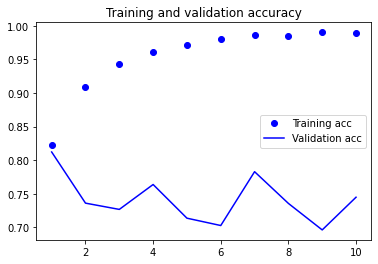

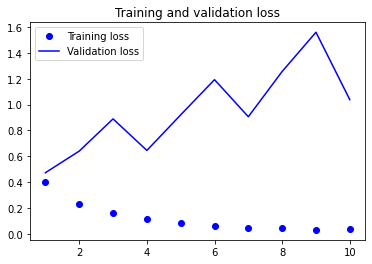

In [79]:
hist = model.history.history
acc = hist["acc"]
val_acc = hist["val_acc"]
loss = hist["loss"]
val_loss = hist["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [80]:
model.evaluate(data, labels)

782/782 [==============================] - 13s 17ms/step - loss: 0.3260 - acc: 0.9211


[0.3259793519973755, 0.9211199879646301]

In [84]:
text = ["Movie is so bad it sucks ass."]
token = tokenizer.texts_to_sequences(text)

In [86]:
pad_token = pad_sequences(token, maxlen=max_len)
print(pad_token)
print(len(pad_token[0]))

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0   16    6   34   75    8 1871 1993]]
120


In [87]:
test_in = np.asarray(pad_token)
test_in.shape

(1, 120)

In [88]:
model.predict(test_in)

array([[0.02371991]], dtype=float32)

In [89]:
text = ["The movie blew my mind it was very good."]
token = tokenizer.texts_to_sequences(text)
pad_token = pad_sequences(token, maxlen=max_len)
print(pad_token)
print(len(pad_token[0]))
test_in = np.asarray(pad_token)
print(test_in.shape)
print(model.predict(test_in))

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    1
    16 4279   57  326    8   12   51   48]]
120
(1, 120)
[[0.9892069]]


In [90]:
text = ["The movie was not so good but it is watchablem."]
token = tokenizer.texts_to_sequences(text)
pad_token = pad_sequences(token, maxlen=max_len)
print(pad_token)
print(len(pad_token[0]))
test_in = np.asarray(pad_token)
print(test_in.shape)
print(model.predict(test_in))

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 16 12 20 34 48 17  8  6]]
120
(1, 120)
[[0.61921746]]


In [91]:
text = ["The movie is so horrible that i died and went to hell."]
token = tokenizer.texts_to_sequences(text)
pad_token = pad_sequences(token, maxlen=max_len)
print(pad_token)
print(len(pad_token[0]))
test_in = np.asarray(pad_token)
print(test_in.shape)
print(model.predict(test_in))

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    1   16    6   34
   523   11    9 1127    2  431    5  605]]
120
(1, 120)
[[0.11269259]]


In [92]:
text = ["Incredible performance amazing actors, and superb direction "]
token = tokenizer.texts_to_sequences(text)
pad_token = pad_sequences(token, maxlen=max_len)
print(pad_token)
print(len(pad_token[0]))
test_in = np.asarray(pad_token)
print(test_in.shape)
print(model.predict(test_in))

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0 1045  235  476  152    2  895  459]]
120
(1, 120)
[[0.99547344]]


In [96]:
#evalutate with test data
import os
test_labels = []
test_texts = []
for i in os.listdir("/content/aclImdb/test/neg"):
    f = open("/content/aclImdb/test/neg/"+i, "r")
    str1 = f.read()
    str1 = cleanhtml(str1)
    test_texts.append(str1)
    test_labels.append(0)
for i in os.listdir("/content/aclImdb/test/pos"):
    f = open("/content/aclImdb/test/pos/"+i, "r")
    str1 = f.read()
    str1 = cleanhtml(str1)
    test_texts.append(str1)
    test_labels.append(1)
test_txt = tokenizer.texts_to_sequences(test_texts )
test_txt = pad_sequences(test_txt, maxlen=max_len)
test_lbl = np.asarray(test_labels)
test_txt = np.asarray(test_txt)

In [99]:
print(len(test_txt))

25000


In [100]:
print(len(test_lbl))

25000


In [101]:
model.evaluate(test_txt, test_lbl)

782/782 [==============================] - 13s 17ms/step - loss: 0.7541 - acc: 0.8097


[0.7540881037712097, 0.8096799850463867]